# Primera tasca APA 2023: Anàlisi fitxer de so

### Nom i cognoms: **Joel Joan Morera | Gerard Cots**

***

### **Proves i exercicis a fer i entregar** 

#### 1. Reprodueix l'exemple fent servir diferents freqüències per al sinusoide. Com a mínim considera $f_x = 4 kHz $ a  kHz, a banda d'una freqüència pròpia en el marge audible. Comenta els resultats.

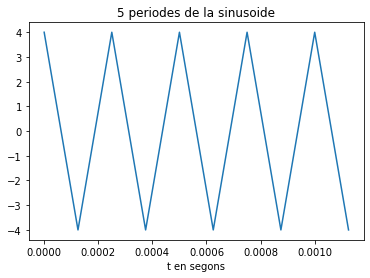

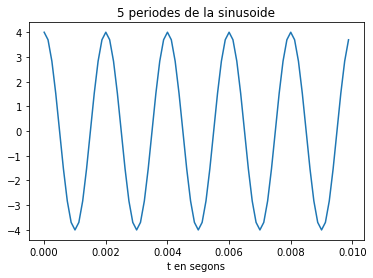

In [2]:
import numpy as np                   # Importem la llibreria numpy
import matplotlib.pyplot as plt      # Importem la llibreria matplotlib
import soundfile as sf               # Importem la llibreria soundfile
import sounddevice as sd             # Importem la llibreria sounddevice

# Paràmetres del senyal sinusoidal i generació dels fitxers de so

T= 2.5                               # Durada de T segons
fm=8000                              # Freqüència de mostratge en Hz
f1=4000                              # Freqüència de la sinusoide (4 kHz)
f2=500                               # Freqüència de la sinusoide (10 kHz)
A=4                                  # Amplitud de la sinusoide
pi=np.pi                             # Valor del número pi
L = int(fm * T)                      # Nombre de mostres del senyal digital
Tm=1/fm                              # Període de mostratge
t=Tm*np.arange(L)                    # Vector amb els valors de la variable temporal, de 0 a T
x1 = A * np.cos(2 * pi * f1 * t)     # Senyal sinusoidal de freqüència f1
x2 = A * np.cos(2 * pi * f2 * t)     # Senyal sinusoidal de freqüència f2
sf.write('so_FREQ1.wav', x1, fm)     # Escriptura del senyal a un fitxer en format wav
sf.write('so_FREQ2.wav', x2, fm)     # Escriptura del senyal a un fitxer en format wav

# Representació dels senyals

T1=1/f1                                   # Període del senyal
T2=1/f2                                   # Període del senyal
Ls1=int(fm*5*T1)                          # Nombre de mostres corresponents a 5 períodes de la sinusoide x1
Ls2=int(fm*5*T2)                          # Nombre de mostres corresponents a 5 períodes de la sinusoide x2

plt.figure(0)                             # Nova figura
plt.plot(t[0:Ls1], x1[0:Ls1])             # Representació del senyal en funció del temps
plt.xlabel('t en segons')                 # Etiqueta eix temporal
plt.title('5 periodes de la sinusoide')   # Títol del gràfic
plt.show()                                # Visualització de l'objecte gràfic.

plt.figure(1)                             # Nova figura
plt.plot(t[0:Ls2], x2[0:Ls2])             # Representació del senyal en funció del temps
plt.xlabel('t en segons')                 # Etiqueta eix temporal
plt.title('5 periodes de la sinusoide')   # Títol del gràfic
plt.show()                                # Visualització de l'objecte gràfic. 

Podem observar que, al ser $f1 = 4 kHz$ (la freqüència límit per cumplir Nyquist **$f \leq \frac{fm}{2}$**), només mostregem les mostres justes per tal de poder representar el senyal sense que aparegui aliasing. Per altre banda la $f2 = 500 Hz$ es representa més fidelment al senyal original. Si volguéssim mostrejar senyals de més de $4 kHz$ hauríem de fer servir una freqüència de mostreig més gran. Com que aquests senyals s'hauran de reproduïr, podriem fer servir la freqüència de mostreig $fm=44100 Hz$ i així ens assegurem que es compleix Nyquist en tot l'ample de banda audible.

#### 2. Modifica el programa per considerar com a senyal a analitzar el senyal del fitxer wav que has creat (`x_r, fm = sf.read('nom_fitxer.wav')`).
    
- Insereix a continuació una gràfica que mostri 5 períodes del senyal i la seva transformada.

- Explica el resultat del apartat anterior.

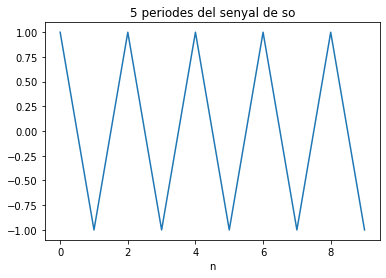

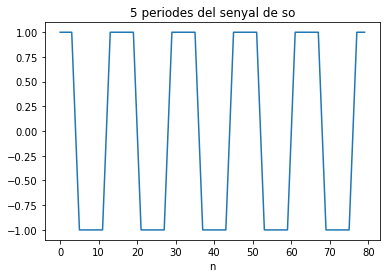

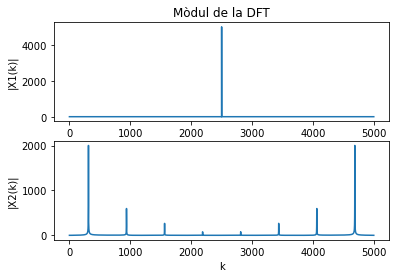

In [74]:
# Analisi de la senyal de so

x1, fm = sf.read('so_FREQ1.wav')         # Lectura del senyal de so
x2, fm = sf.read('so_FREQ2.wav')         # Lectura del senyal de so

# Represntació de 5 períodes dels senyals de so

plt.figure(2)                            # Nova figura
plt.plot(x1[0:Ls1])                      # Representació del senyal en funció del temps
plt.xlabel('n')                          # Etiqueta eix temporal
plt.title('5 periodes del senyal de so') # Títol del gràfic
plt.show()                               # Visualització de l'objecte gràfic.

plt.figure(3)                            # Nova figura
plt.plot(x2[0:Ls2])                      # Representació del senyal en funció del temps
plt.xlabel('n')                          # Etiqueta eix temporal
plt.title('5 periodes del senyal de so') # Títol del gràfic
plt.show()                               # Visualització de l'objecte gràfic.

# Transformat de Fourier dels senyals de so

N = 5000                                 # Nombre de mostres de la DFT
X1 = np.fft.fft(x1, N)                   # Càlcul de la DFT
X2 = np.fft.fft(x2, N)                   # Càlcul de la DFT

plt.figure(4)                            # Nova figura
plt.subplot(2,1,1)                       # Subgràfic 1
plt.plot(np.arange(N), np.abs(X1))       # Representació del mòdul de la DFT
plt.title('Mòdul de la DFT')             # Títol del gràfic
plt.ylabel('|X1(k)|')                    # Etiqueta eix de les ordenades
plt.xlabel('k')                          # Etiqueta eix de les abcisses
plt.subplot(2,1,2)                       # Subgràfic 2
plt.plot(np.arange(N), abs(X2))          # Representació del mòdul de la DFT
plt.ylabel('|X2(k)|')                    # Etiqueta eix de les ordenades
plt.xlabel('k')                          # Etiqueta eix de les abcisses
plt.show()                               # Visualització de l'objecte gràfic.






Primer de tot podem observar que el senyal f2 mostrejat és diferent al senyal f2 original, això és degut a que alguna de les funcions (write o read) **ha normalitzat** els senyals entre -1 i 1, en el cas de f2, **saturant** tots els valors que es trobaven fora d'aquest rang. Això provoca que apareguin harmònics al espectre freqüencial de la $f2$. Pel que fa a l'espectre del senyal $f1$, aquest és molt ample perquè només hem tingut en compte només 5 períodes per a fer la FFT. Podem observar com hi apareix la freqüència correponent a 0.5 (si normalitzem l'espectre a 1), que correspon als $4 kHz$ ja que $fm = 8kHz$.

#### 3. Modifica el programa perquè representi el mòdul de la Transformada de Fourier en dB i l'eix de les abscisses en el marge de 0 a $f_m/2$ en Hz.

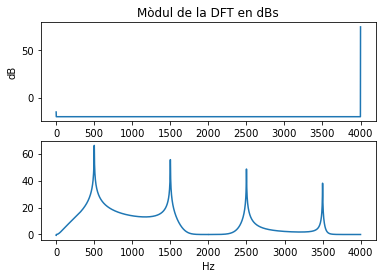

In [70]:
# Representació en dBs i Hz

freqs = ((np.arange(N)/N)*fm)
eps = 0.1                                                                               # Constant per evitar el logaritme de zero
dB1 = 20*np.log10(np.abs(X1) + eps)                                                     # Càlcul del mòdul en dBs
dB2 = 20*np.log10(np.abs(X2))                                                           # Càlcul del mòdul en dBs

plt.figure(5)                                                                           # Nova figura
plt.subplot(211)                                                                        # Subgràfic 1
plt.plot(freqs[0 : int(len(freqs)/2 + 1)], dB1[0 : int(len(dB1)/2 + 1)])                # Representació del mòdul de la DFT en dBs i fins a la meitat de la freqüència de mostreig
plt.title('Mòdul de la DFT en dBs')                                                     # Títol del gràfic
# plt.ylim(0, 40)                                                                       # Limitació de l'eix de les ordenades
plt.ylabel('dB')                                                                        # Etiqueta eix de les ordenades
plt.subplot(212)                                                                        # Subgràfic 2
plt.plot(freqs[0 : int(len(freqs)/2)], dB2[0 : int(len(dB2)/2)])                        # Representació del mòdul de la DFT
# plt.ylim(0, 40)                                                                       # Limitació de l'eix de les ordenades (per tal de millorar la visualització)
plt.xlabel('Hz')                                                                        # Etiqueta eix de les abcisses
plt.show()                                                                              # Visualització de l'objecte gràfic.


En primer lloc podem veure que la relació senyal soroll mesurat logarítmicament (que és la manera de fer-ho més fidel a la percepció humana), no és tant bona com semblava linealment. Ara però ens és més fàcil veure les freqüències presents en Hz. El més interessant és el que observem a $f2$, ja que els harmònics que veiem són els imparells. 

Per saber l'amplitud de la sinusoide a partir del mòdul de l'espectre hem de dividir el valor del mòdul pel nombre de mostres de la FFT i multiplicar per 2 en cas de que l'espectre es repeteixi (en el cas de $f = 4000 Hz$ no cal multiplicar-ho per 2). Si el mòdul està en dBs primer s'ha de passar a lineal i després fer el procediment anterior.

#### 4. Tria un fitxer d'àudio en format wav i mono (el pots aconseguir si en tens amb altres formats amb el programa Audacity). Llegeix el fitxer d'àudio i comprova:

- Freqüència de mostratge.
- Nombre de mostres de senyal.
- Tria un segment de senyal de 25ms i insereix una gráfica amb la seva evolució temporal.
- Representa la seva transformada en dB en funció de la freqüència, en el marge $0 \leq f \leq fm / 2$
- Quines son les freqüències més importants del segment triat?

In [91]:
# Per tal de fer aquest exercici farem servir el fitxer de so "luzbel44.wav"

import soundfile as sf                                      # Importem la llibreria soundfile
import numpy as np                                          # Importem la llibreria numpy
import matplotlib.pyplot as plt                             # Importem la llibreria matplotlib
import sounddevice as sd                                    # Importem la llibreria sounddevice

x, fm = sf.read('luzbel44.wav')                             # Lectura del senyal de so
L = len(x)                                                  # Nombre de mostres del senyal de so
Tm=1/fm                                                     # Període de mostratge

print('La freqüència de mostreig és:', fm, 'Hz')            # Mostra de la freqüència de mostreig
print('El període de mostreig és:', Tm, 's')                # Mostra del període de mostreig
print('El nombre de mostres del senyal de so és:', L)       # Mostra del nombre de mostres del senyal de so
print('La durada del senyal de so és:', L*Tm, 's')          # Mostra de la durada del senyal de so

La freqüència de mostreig és: 44100 Hz
El període de mostreig és: 2.2675736961451248e-05 s
El nombre de mostres del senyal de so és: 95091
La durada del senyal de so és: 2.1562585034013604 s


El nombre de mostres corresponents a 25 ms és: 1102


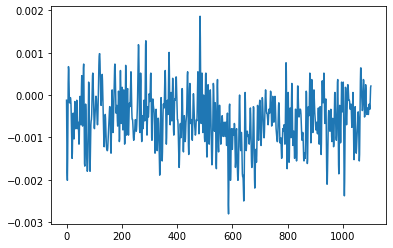

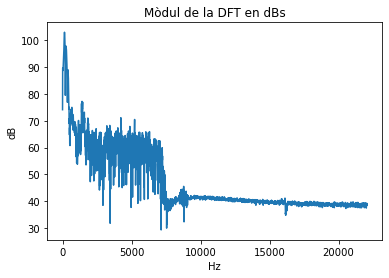

In [94]:
# Sabent el nombre de mostres i el període de mostreig, podem calcular quantes mostres són 25 ms.

T25ms = 25e-3                                                           # Durada de 25 ms
N25ms = int(T25ms/Tm)                                                   # Nombre de mostres corresponents a 25 ms
print('El nombre de mostres corresponents a 25 ms és:', N25ms)          # Mostra del nombre de mostres corresponents a 25 ms

# Representació del senyal de so

plt.figure(0)                                                           # Nova figura
plt.plot(x[500 : 500 + N25ms])                                          # Representació del senyal en funció del temps
plt.show()                                                              # Visualització de l'objecte gràfic.

# Representació de l'espectre de magnitud del senyal de so

N = 5000                                                                # Nombre de mostres de la DFT
X = np.fft.fft(10000*x, N)                                              # Càlcul de la DFT
freqs = ((np.arange(N)/N)*fm)                                           # Càlcul del vector de freqüències
dB = 20*np.log10(np.abs(X))                                             # Càlcul del mòdul en dBs

plt.figure(1)                                                           # Nova figura
plt.plot(freqs[0 : int(len(freqs)/2 + 1)], dB[0 : int(len(dB)/2 + 1)])  # Representació del mòdul de la DFT en dBs i fins a la meitat de la freqüència de mostreig
plt.title('Mòdul de la DFT en dBs')                                     # Títol del gràfic
plt.ylabel('dB')                                                        # Etiqueta eix de les ordenades
plt.xlabel('Hz')                                                        # Etiqueta eix de les abcisses
plt.show()                                                              # Visualització de l'objecte gràfic.


Veient l'espectre podem observar que les components freqüencials més importants del tram escollit són les que van de 0 a uns 8000 Hz, això és degut a que es tracta d'un senyal de veu, el rang freqüencial es concentra a les freqüències més baixes.